In [1]:
#!pip install plotly

In [35]:
import pandas as pd
import os
import numpy as np
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection._split import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
import plotly.express as px

In [36]:
os.chdir(r'C:\Users\obuli\Karthi O\Preprocessing')
fraud_data = pd.read_csv('fraud-detection.csv')
fraud_data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
100160,10,CASH_IN,61054.02,C1657461053,11600000.0,11700000.00,C622723232,1054868.85,993814.83,0
100161,10,CASH_IN,347608.07,C199435243,11700000.0,12000000.00,C1029211742,1814256.11,3246825.50,0
100162,10,CASH_IN,68846.64,C975194954,12000000.0,12100000.00,C355970563,1622436.37,2287253.07,0
100163,10,CASH_IN,48078.78,C1122979545,12100000.0,12200000.00,C589884531,410069.03,161779.60,0


In [37]:
fraud_data.shape

(100165, 10)

In [38]:
fraud_data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [39]:
fraud_data["type"]

0          PAYMENT
1          PAYMENT
2         TRANSFER
3         CASH_OUT
4          PAYMENT
            ...   
100160     CASH_IN
100161     CASH_IN
100162     CASH_IN
100163     CASH_IN
100164     CASH_IN
Name: type, Length: 100165, dtype: object

In [40]:
type = fraud_data["type"].value_counts()
trx = type.index
qty = type.values

figure = px.pie(fraud_data, values=qty, names=trx, hole=0.3, title="Distribution of Trx Type")
figure.show()

In [30]:
#transform the categorical into numeric values
fraud_data["type"] = fraud_data["type"].map({"CASH_OUT": 1, "PAYMENT": 2, 
                                 "CASH_IN": 3, "TRANSFER": 4,
                                 "DEBIT": 5})
fraud_data["isFraud"] = fraud_data["isFraud"].map({0: "No Fraud", 1: "Fraud"})

In [8]:
fraud_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,No Fraud
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,No Fraud
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,Fraud
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,Fraud
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,No Fraud


In [9]:
fraud_data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [10]:
X = fraud_data.drop(['nameOrig','nameDest','step','isFraud'], 1)


C:\Users\obuli\AppData\Local\Temp/ipykernel_21228/3678425066.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [11]:
X

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,2,9839.64,170136.0,160296.36,0.00,0.00
1,2,1864.28,21249.0,19384.72,0.00,0.00
2,4,181.00,181.0,0.00,0.00,0.00
3,1,181.00,181.0,0.00,21182.00,0.00
4,2,11668.14,41554.0,29885.86,0.00,0.00
...,...,...,...,...,...,...
100160,3,61054.02,11600000.0,11700000.00,1054868.85,993814.83
100161,3,347608.07,11700000.0,12000000.00,1814256.11,3246825.50
100162,3,68846.64,12000000.0,12100000.00,1622436.37,2287253.07
100163,3,48078.78,12100000.0,12200000.00,410069.03,161779.60


In [12]:
#target - isFraud
y= fraud_data.iloc[:,-1]
y

0         No Fraud
1         No Fraud
2            Fraud
3            Fraud
4         No Fraud
            ...   
100160    No Fraud
100161    No Fraud
100162    No Fraud
100163    No Fraud
100164    No Fraud
Name: isFraud, Length: 100165, dtype: object

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

In [14]:
model=GaussianNB()

In [15]:
model.fit(X_train, y_train)

GaussianNB()

In [16]:
y_prediction= model.predict(X_test)

In [17]:
y_prediction

array(['No Fraud', 'No Fraud', 'No Fraud', ..., 'No Fraud', 'No Fraud',
       'No Fraud'], dtype='<U8')

In [18]:
acc_score = accuracy_score(y_test, y_prediction)
acc_score

0.9830779214296411

In [19]:
# testing the prediction by passing test data
#type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
newtestdata = np.array([[4,1653198.69,135900.32,0.0,0.00,1653198.69]])

In [20]:
model.predict(newtestdata)

C:\Users\obuli\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names



array(['Fraud'], dtype='<U8')

In [21]:
cm=confusion_matrix(y_test, y_prediction)

In [22]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

       Fraud       0.01      0.19      0.02        21
    No Fraud       1.00      0.98      0.99     20012

    accuracy                           0.98     20033
   macro avg       0.51      0.59      0.51     20033
weighted avg       1.00      0.98      0.99     20033



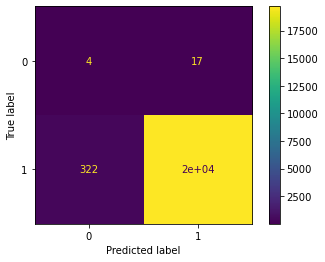

In [23]:
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

In [24]:
result = X_test[y_test != y_prediction].reset_index(drop=True)
test = pd.DataFrame(y_test[y_test != y_prediction]).rename(columns={'isFraud':'Actual'}).reset_index(drop=True)
pred = pd.DataFrame(y_prediction[y_test != y_prediction]).rename(columns={0:'Predicted'}).reset_index(drop=True)
pd.concat([result,test,pred],axis=1).reset_index(drop=True)


,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,Actual,Predicted
0,4,1653198.69,135900.32,0.0,0.00,1653198.69,No Fraud,Fraud
1,4,1924263.65,187189.50,0.0,142441.31,2636400.78,No Fraud,Fraud
2,4,2931734.97,0.00,0.0,3716898.00,6787849.45,No Fraud,Fraud
3,4,2893217.94,120694.16,0.0,8665213.82,11600000.00,No Fraud,Fraud
4,4,2643603.86,219217.76,0.0,5630975.52,8482970.51,No Fraud,Fraud
...,...,...,...,...,...,...,...,...
334,4,1611903.82,20139.00,0.0,41645.00,1768295.91,No Fraud,Fraud
335,4,2362491.73,31479.00,0.0,405271.18,7022510.07,No Fraud,Fraud
336,4,2665719.31,9218.00,0.0,11117.00,2972432.62,No Fraud,Fraud
337,4,2170985.53,25976.00,0.0,187126.82,2064811.58,No Fraud,Fraud


###  Accuracy score is 98.3% from this NB model